In [2]:
from constants import *
import matplotlib.pyplot as plt
import scipy.optimize as op
from numba import jit

In [3]:
#constants
print(B/1.6022e-12)

13.604887827795707


In [4]:
#functions
#Temperature in Kelvin
@jit(nopython=True)
def Temp(z):
    return T0*(1+z) 
@jit(nopython=True)
def X_eq(z):
    S = 4*np.sqrt(2/pi)*z3*eta*(Temp(z)/(m*c*c))**1.5*np.exp(B/Temp(z))
    X = (-1+np.sqrt(1+4*S))/(2*S)
    return X
@jit(nopython=True) 
def n_g(z):
    return (Temp(z)/hc)**3*16*pi*z3
@jit(nopython=True)
def a1(z):
    return A*np.sqrt(B/Temp(z))
@jit(nopython=True)
def Gam(z):
    return X_eq(z)*eta*n_g(z)*a1(z)
@jit(nopython=True)
def Hu(z):
    H0 = 100*h/3.0857e19
    return H0*np.sqrt(Orh2/h/h*(1+z)**4+Omh2/h/h*(1+z)**3+Ol)
@jit(nopython=True)
def Thomson(z):
    s = 8*pi*(q*q/(m*c))**2/3
    return X_eq(z)*eta*n_g(z)*s/c
#freeze-out
def fo(rate, guess):
    def func(z):
        return rate(z)-Hu(z)
    root = op.fsolve(func, guess)
    return root

In [5]:
z = np.linspace(800,1500,500)
G = Gam(z)
H = Hu(z)

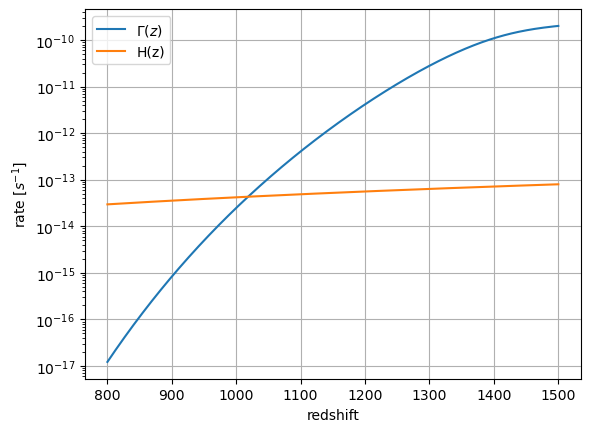

In [6]:
plt.plot(z, G, label='$\Gamma(z)$')
plt.plot(z, H, label='H(z)')
plt.yscale('log')
plt.ylabel('rate [$s^{-1}$]')
plt.xlabel('redshift')
plt.legend()
plt.grid()
plt.savefig('Images/freeze-out.png', dpi=300)
plt.show()

In [7]:
recombfo = fo(Gam, 1000)
z_crit = recombfo[0]
print('hydrogen recombination freeze-out at z =',z_crit)

hydrogen recombination freeze-out at z = 1018.3741193176171


In [8]:
X_crit = X_eq(z_crit)
print('remaining free electron fraction at hydrogen freeze-out is X =', X_crit)

remaining free electron fraction at hydrogen freeze-out is X = 0.000526939140727071


In [9]:
#thomson rate at this z
crit_Th = Thomson(z_crit)
#Hubble at this z
H_crit = Hu(z_crit)

print('Rate of Thomson scattering is {} while the Hubble parameter is {}'.format(crit_Th, H_crit))

Rate of Thomson scattering is 2.75233698735961e-15 while the Hubble parameter is 4.3112955594752425e-14


In [10]:
Th = Thomson(z)
#for i in range(len(Th)):
#    if z[i] <= z_crit:
#        Th[i] = Thomson(z[i], X_crit)

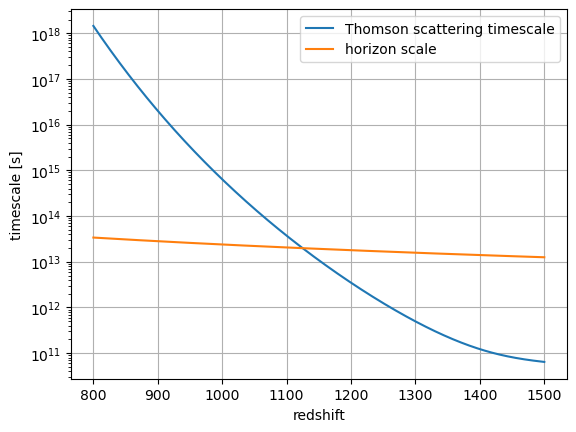

In [11]:
plt.plot(z, 1/Th, label='Thomson scattering timescale')
plt.plot(z, 1/H, label='horizon scale')
plt.ylabel('timescale [s]')
plt.xlabel('redshift')
#plt.plot(z, 1/G, label='Recombination rates')
plt.grid()
plt.legend()
plt.yscale('log')
plt.savefig('Images/thomson.png', dpi=300)
plt.show()

In [12]:
#Thomson freeze-out
Thfo = fo(Thomson, 1100)
z_th = Thfo[0]
print('Thomson scattering freeze-out at z =',z_crit)

Thomson scattering freeze-out at z = 1018.3741193176171


In [13]:
X_th = X_eq(z_th)
print('free electron fraction at Thomson freeze-out is X =', X_th)

free electron fraction at Thomson freeze-out is X = 0.007166995712882536
